In [ ]:
!git clone https://github.com/tnwei/waternet.git

Cloning into 'waternet'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 131 (delta 30), reused 29 (delta 29), pack-reused 95
Receiving objects: 100% (131/131), 468.06 KiB | 4.68 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

%matplotlib inline

In [1]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();


NameError: name 'torch' is not defined

In [ ]:
# Read images
hazy_im = cv2.imread("blurry.png")
clear_im = cv2.imread("real.png")

In [ ]:
# Convert from BGR to RGB
hazy_rgb_im = cv2.cvtColor(hazy_im, cv2.COLOR_BGR2RGB)
clear_rgb_im = cv2.cvtColor(clear_im, cv2.COLOR_BGR2RGB)

In [ ]:
# Resize images
hazy_rgb_im = cv2.resize(hazy_rgb_im, (720, 480))
clear_rgb_im = cv2.resize(clear_rgb_im, (720, 480))

In [ ]:
# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(hazy_rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
generated_im = postprocess(out_ten)[0]

In [ ]:

import torch
import math
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Assuming 'clear_rgb_im' and 'generated_im' are numpy arrays and need to be converted to torch tensors
clear_tensor = torch.tensor(clear_rgb_im).float()  # Ensure tensor is float type for precise calculations
generated_tensor = torch.tensor(generated_im).float()

# Calculate MSE
mse_value = torch.mean((clear_tensor - generated_tensor) ** 2).item()

# Calculate RMSE
rmse_value = math.sqrt(mse_value)

# Calculate PSNR and SSIM (continuing to use skimage as they are still numpy arrays)
psnr_value = psnr(clear_rgb_im, generated_im, data_range=generated_im.max() - generated_im.min())
ssim_value = ssim(clear_rgb_im, generated_im, multichannel=True)

# Output the metrics
print(f"MSE: {mse_value}")
print(f"RMSE: {rmse_value}")
print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.4f}")



MSE: 404.0490417480469
RMSE: 20.100971164300667
PSNR: 22.07
SSIM: 0.7515


<ipython-input-56-0d88e5b17c04>:17: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(clear_rgb_im, generated_im, multichannel=True)


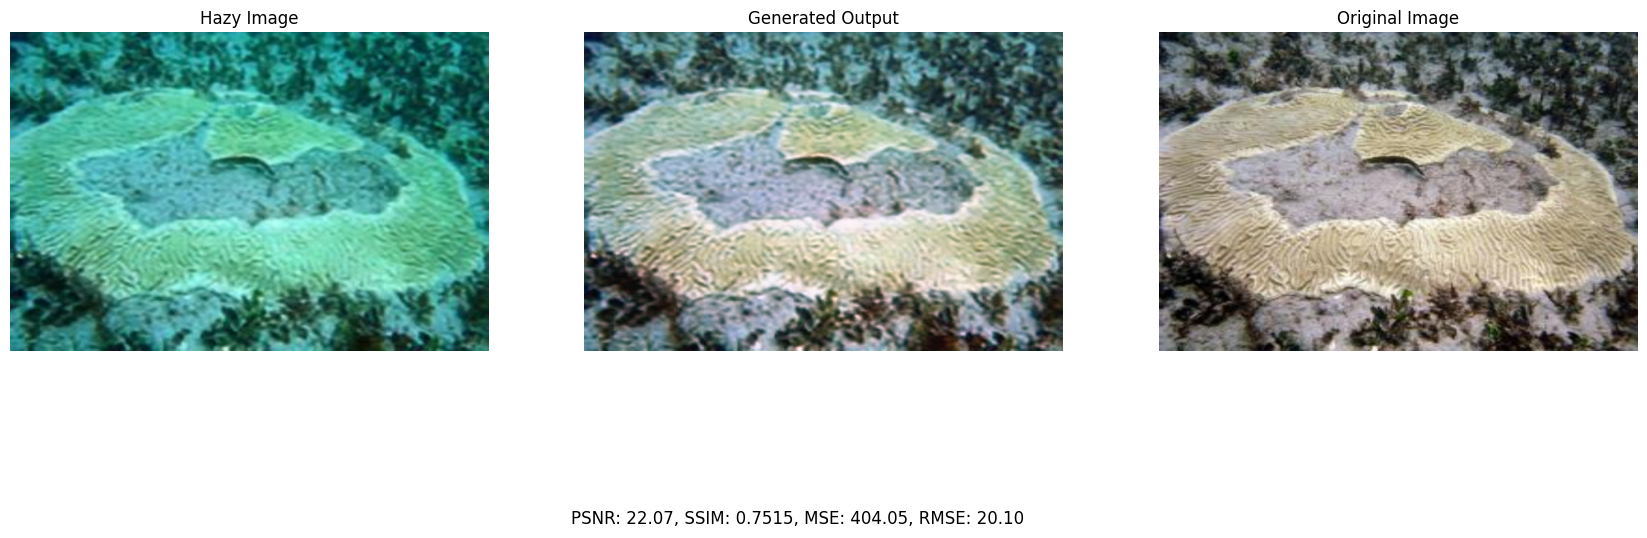

In [ ]:
# Display images and metrics
fig, ax = plt.subplots(ncols=3, figsize=(21, 7))
ax[0].imshow(hazy_rgb_im)
ax[0].axis("off")
ax[0].set_title("Hazy Image")

ax[1].imshow(generated_im)
ax[1].axis("off")
ax[1].set_title("Generated Output")

ax[2].imshow(clear_rgb_im)
ax[2].axis("off")
ax[2].set_title("Original Image")

plt.figtext(0.5, 0.02, f"PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}, MSE: {mse_value:.2f}, RMSE: {rmse_value:.2f}", ha="center", fontsize=12)
plt.show()